# Week 4 Participation

Name: Peter Rock

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
import sklearn.model_selection
import sklearn.tree
import sklearn.ensemble

This week, we'll be exploring the differences that arise when using Tree and Ensemble methods to classify various problems. First we'll look at how classifiers do on some generated data (blobs), then we'll move to some real-world datasets found within SKLearn.

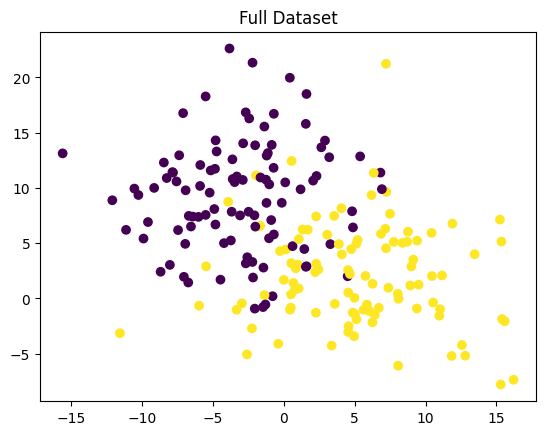

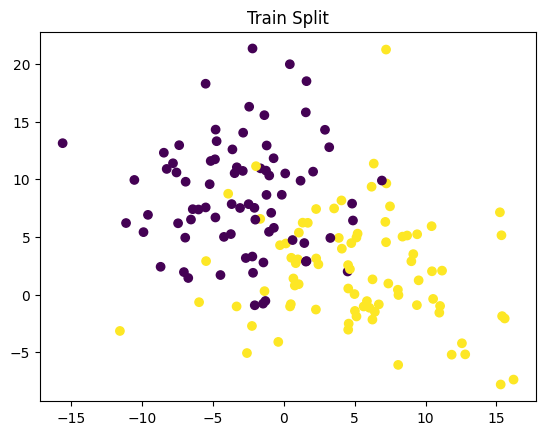

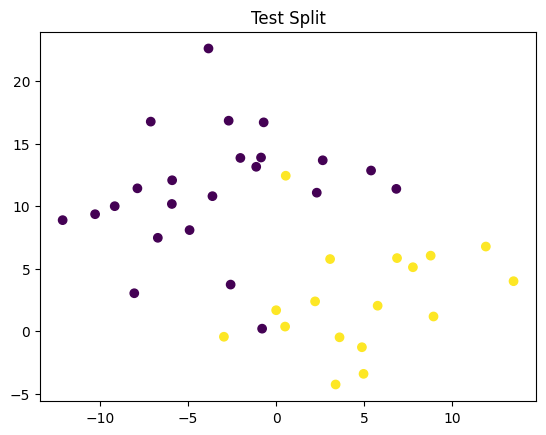

In [2]:
blob_X, blob_y = sklearn.datasets.make_blobs(n_samples=200, centers = 2, cluster_std=5, random_state = 42)

blob_X_train, blob_X_test, blob_y_train, blob_y_test = sklearn.model_selection.train_test_split(blob_X, blob_y,
                                                                            train_size=0.8, random_state = 42)

plt.scatter(blob_X[:,0], blob_X[:,1], c=blob_y)
plt.title("Full Dataset")
plt.show()

plt.scatter(blob_X_train[:,0], blob_X_train[:,1], c=blob_y_train)
plt.title("Train Split")
plt.show()

plt.scatter(blob_X_test[:,0], blob_X_test[:,1], c=blob_y_test)
plt.title("Test Split")
plt.show()

As you can see, this Blobs dataset is messy. There's a lot of overlap between samples.

## Part 1: Classifier Comparison.

Let's see how some of the classifier's we're studying can do on this dataset.

Tree accuracy
0.875
Forest accuracy
0.9
AdaBoost accuracy
0.925


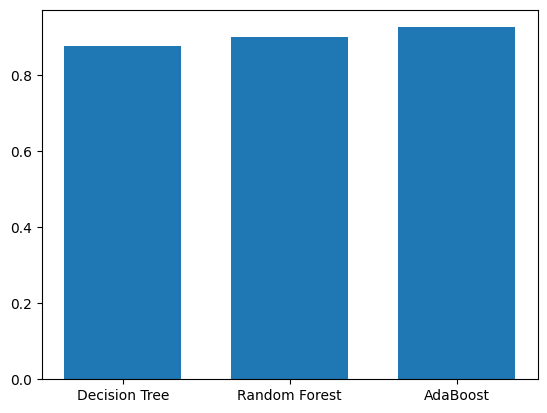

In [8]:
labels = np.array([])
scores = np.array([])

blob_tree_model = sklearn.tree.DecisionTreeClassifier()
blob_tree_model.fit(blob_X_train, blob_y_train)
print("Tree accuracy")
score = blob_tree_model.score(blob_X_test, blob_y_test)
print(score)
labels = np.append(labels,"Decision Tree")
scores = np.append(scores,[score])

blob_forest_model = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
blob_forest_model.fit(blob_X_train, blob_y_train)
print("Forest accuracy")
score = blob_forest_model.score(blob_X_test, blob_y_test)
print(score)
labels = np.append(labels, "Random Forest")
scores = np.append(scores,[score])

blob_boost_model = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, algorithm='SAMME')
blob_boost_model.fit(blob_X_train, blob_y_train)
print("AdaBoost accuracy")
score = blob_boost_model.score(blob_X_test, blob_y_test)
print(score)
labels = np.append(labels,"AdaBoost")
scores = np.append(scores,[score])

width = 0.7
ind = range(len(scores))
plt.bar(ind, scores, width)
plt.xticks(ind, labels)
plt.show()

Run the multi-model training several times and answer the following questions:

1) What model does the best? The worst? Why do you think that is so?

### Q1 Answer

It looks like the AdaBoost model does the best. This is likely because the data set has a pretty nice split along the 
$y = x+5$ line, so you can obtain a pretty high level of accuracy by making a few cuts along that line. The random forest
does relatively well on average, but its effectiveness varies from run to run.

2) What model(s) do the same every time? What model(s) change from run to run? Why do you think that is so?

### Q2 Answer

The decision tree and AdaBoost methods are deterministic, so they do the same every time. RandomForest, per its name,
just generates a forest of random decision trees, so its effectiveness can vary on the test set every time it is run.

## Part 2: Different Dataset

Now let's see how these models do on a different dataset.

### Multiblobs

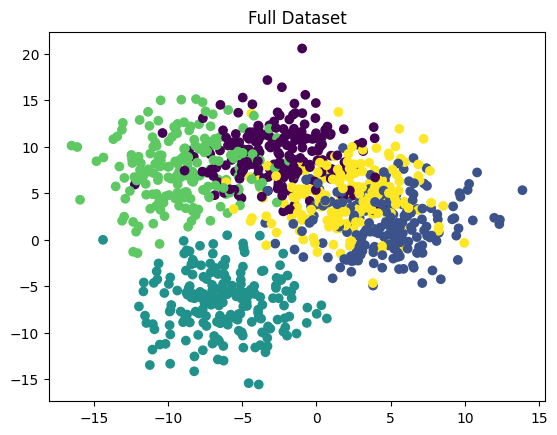

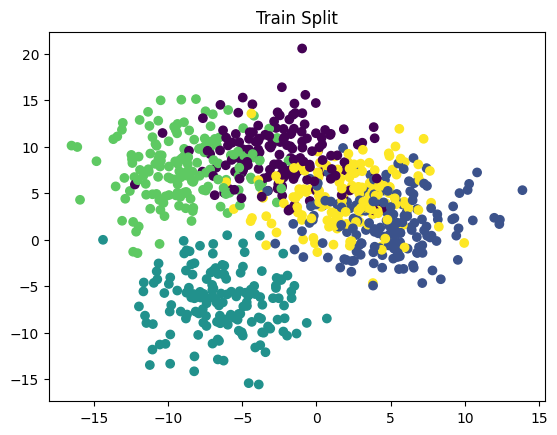

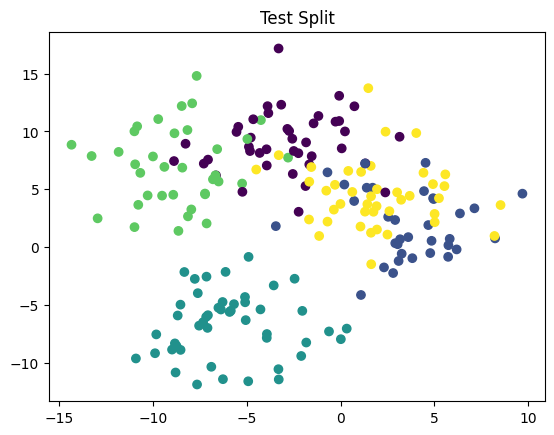

In [9]:
multiblob_X, multiblob_y = sklearn.datasets.make_blobs(n_samples=1000, centers = 5, cluster_std=3, random_state = 42)

multiblob_X_train, multiblob_X_test, multiblob_y_train, multiblob_y_test = sklearn.model_selection.train_test_split(
    multiblob_X, multiblob_y, train_size=0.8, random_state = 42)

plt.scatter(multiblob_X[:,0], multiblob_X[:,1], c=multiblob_y)
plt.title("Full Dataset")
plt.show()

plt.scatter(multiblob_X_train[:,0], multiblob_X_train[:,1], c=multiblob_y_train)
plt.title("Train Split")
plt.show()

plt.scatter(multiblob_X_test[:,0], multiblob_X_test[:,1], c=multiblob_y_test)
plt.title("Test Split")
plt.show()

Now we will generate the same accuracy results for the multiblob as we did for the binary blobs above.

Tree accuracy
0.715
Forest accuracy
0.775
AdaBoost accuracy
0.69


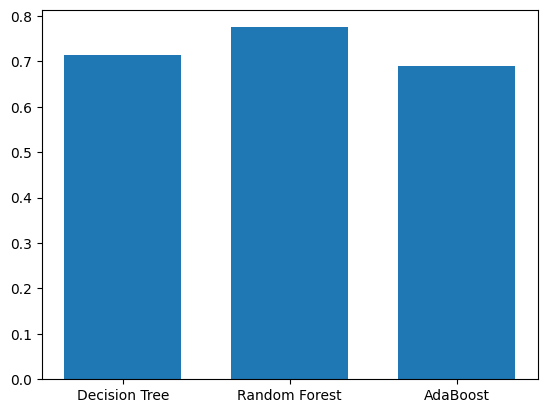

In [15]:
labels = np.array([])
scores = np.array([])

multiblob_tree_model = sklearn.tree.DecisionTreeClassifier()
multiblob_tree_model.fit(multiblob_X_train, multiblob_y_train)
print("Tree accuracy")
score = multiblob_tree_model.score(multiblob_X_test, multiblob_y_test)
print(score)
labels = np.append(labels,"Decision Tree")
scores = np.append(scores,[score])

multiblob_forest_model = sklearn.ensemble.RandomForestClassifier(n_estimators=200)
multiblob_forest_model.fit(multiblob_X_train, multiblob_y_train)
print("Forest accuracy")
score = multiblob_forest_model.score(multiblob_X_test, multiblob_y_test)
print(score)
labels = np.append(labels, "Random Forest")
scores = np.append(scores,[score])

multiblob_boost_model = sklearn.ensemble.AdaBoostClassifier(n_estimators=200, algorithm='SAMME')
multiblob_boost_model.fit(multiblob_X_train, multiblob_y_train)
print("AdaBoost accuracy")
score = multiblob_boost_model.score(multiblob_X_test, multiblob_y_test)
print(score)
labels = np.append(labels,"AdaBoost")
scores = np.append(scores,[score])

width = 0.7
ind = range(len(scores))
plt.bar(ind, scores, width)
plt.xticks(ind, labels)
plt.show()

3) How do these results compare to the binary blobs results? Are different models doing better? Worse? Why do you think that might be so?

### Q3 Response

In this case, it looks like the Random Forest does the best on average compared to the decision tree and AdaBoost. This
is likely due to the fact that we are trying to do more than just binary classification. For AdaBoost, this means that
for any particular cut that we make, we are still likely to get quite a few things classified incorrectly, so each 
iteration of the algorithm will end up emphasizing points that are away from the center of density for our dataset. 
In short, our dataset is a bit too noisy for us to expect AdaBoost to perform well due to its outlier sensitivity. The
decision tree model does slightly better since it is less likely to pick points away from the center of density, but the
Random Forest approach does the best since it makes a bunch of random decision trees (which were already pretty good for
this data set) and aggregates their results. 

## Part 3: Exploring Components of Ensembles

Now that we have built AdaBoost models for a couple of different datasets, let's see what the components look like. There's no Question Response here, I just wanted to show off some things.

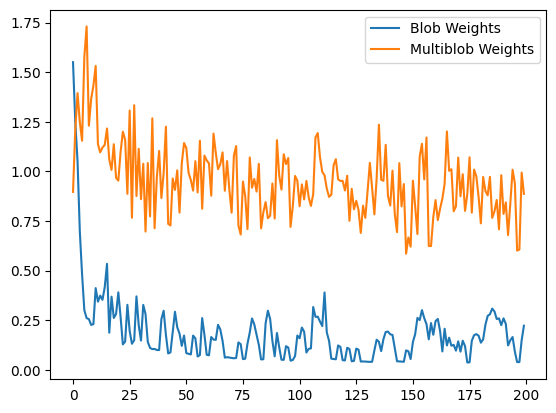

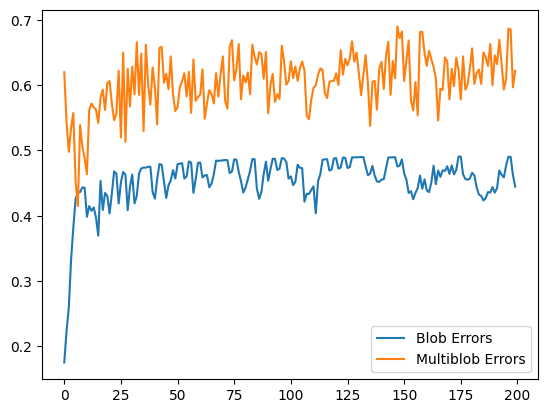

In [16]:
blob_weights = blob_boost_model.estimator_weights_
multiblob_weights = multiblob_boost_model.estimator_weights_

blob_errors = blob_boost_model.estimator_errors_
multiblob_errors = multiblob_boost_model.estimator_errors_

count = range(200)

plt.plot(count, blob_weights, label="Blob Weights")
plt.plot(count, multiblob_weights, label="Multiblob Weights")
plt.legend()
plt.show()


plt.plot(count, blob_errors, label="Blob Errors")
plt.plot(count, multiblob_errors, label="Multiblob Errors")
plt.legend()
plt.show()

Here, I am plotting the weights for each individual classifier (top) and the error associated with that classifier (bottom).

### The Weights (and the errors) tend to find an equillibrium

As we add classifiers, we are continuing to increase and decrease the weight for each point, but we see that the error levels out as we increase the number of individual classifiers.

### The error for Multiblobs is above 0.5

We discussed the fact that, thanks to SAMME, we can have errors above 0.5 (the random guess split for a binary model), but our classifier needs to do slightly better than chance (0.2, in this 5 class case).

However, visualizing the results of some individual classifiers can tell us more. I'll plot the ground truth labels and the predicted labels for a couple of individual classifiers in the ensemble (index 0 and index 100)

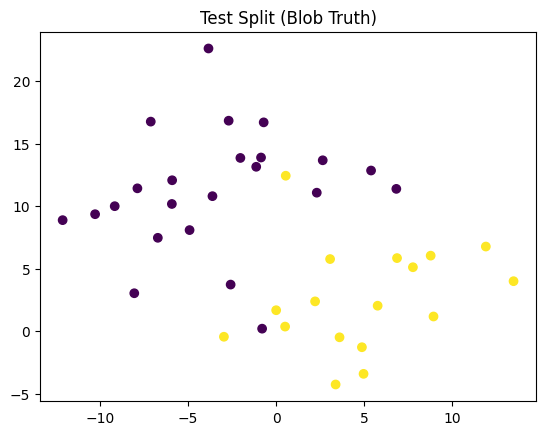

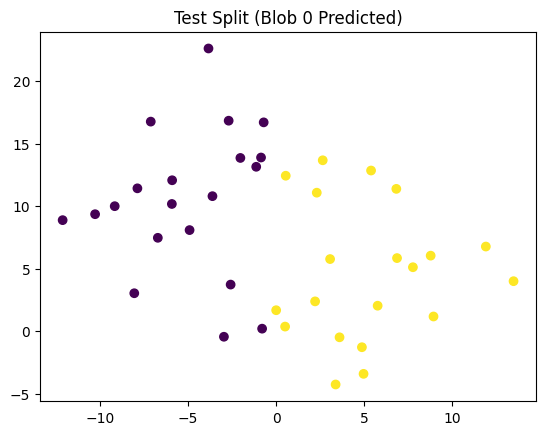

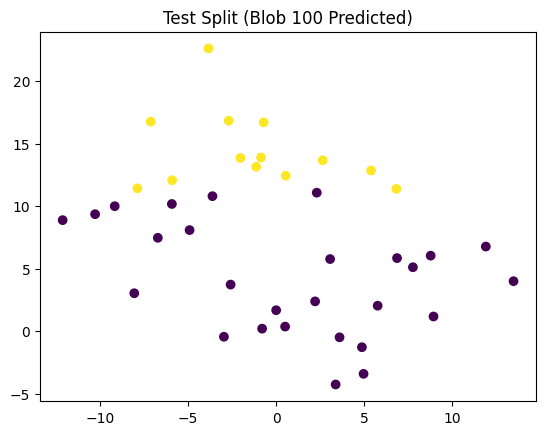

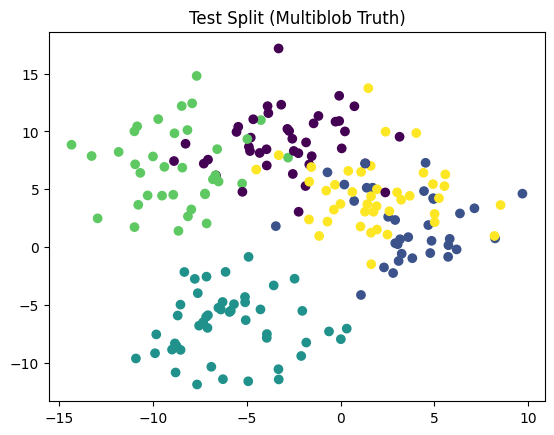

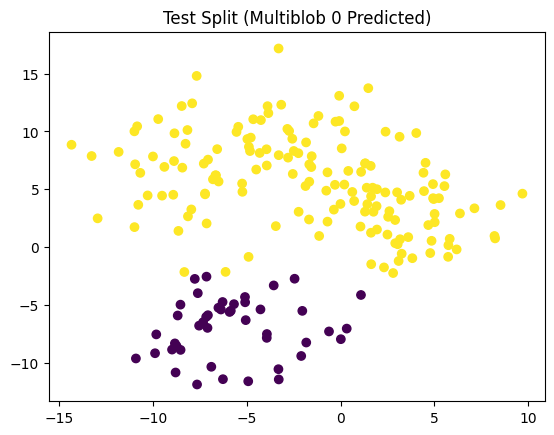

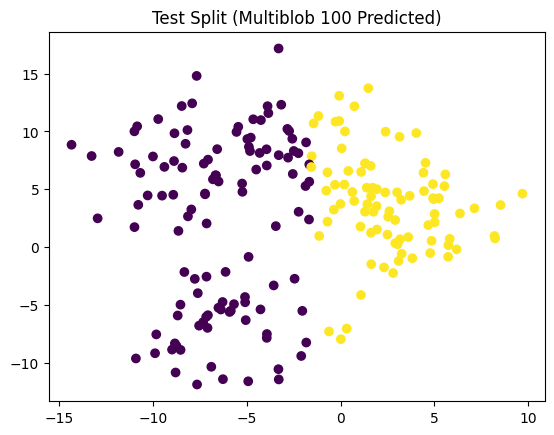

In [17]:
plt.scatter(blob_X_test[:,0], blob_X_test[:,1], c=blob_y_test)
plt.title("Test Split (Blob Truth)")
plt.show()

blob_estimator_0 = blob_boost_model.estimators_[0]
b0_y_pred = blob_estimator_0.predict(blob_X_test)
plt.scatter(blob_X_test[:,0], blob_X_test[:,1], c=b0_y_pred)
plt.title("Test Split (Blob 0 Predicted)")
plt.show()

blob_estimator_100 = blob_boost_model.estimators_[100]
b100_y_pred = blob_estimator_100.predict(blob_X_test)
plt.scatter(blob_X_test[:,0], blob_X_test[:,1], c=b100_y_pred)
plt.title("Test Split (Blob 100 Predicted)")
plt.show()

plt.scatter(multiblob_X_test[:,0], multiblob_X_test[:,1], c=multiblob_y_test)
plt.title("Test Split (Multiblob Truth)")
plt.show()

multiblob_estimator_0 = multiblob_boost_model.estimators_[0]
m0_y_pred = multiblob_estimator_0.predict(multiblob_X_test)
plt.scatter(multiblob_X_test[:,0], multiblob_X_test[:,1], c=m0_y_pred)
plt.title("Test Split (Multiblob 0 Predicted)")
plt.show()

multiblob_estimator_100 = multiblob_boost_model.estimators_[100]
m100_y_pred = multiblob_estimator_100.predict(multiblob_X_test)
plt.scatter(multiblob_X_test[:,0], multiblob_X_test[:,1], c=m100_y_pred)
plt.title("Test Split (Multiblob 100 Predicted)")
plt.show()

### Each Classifier Kinda Stinks

As we expect, each individual classifier is not doing very well.

### Each Multiblob Classifier is Still Binary!

The visualization of the multiblob is the most telling to me. We're trying to classify 5 different classes, but we're still using a bunch of binary deciders to do so. We'll explore this phenomenon later.